# Some routines for analysing Fermi data


## Using equatorial coordinates

RA and Dec ($\alpha$ and $\delta$, longitude and latitiude).  
Determine separation of two points.  
Convert between standard RA (-180...180 degrees) and Fermi RA (0...360 degrees).    
Make plots using standard astronomical projections.
Hammer:
$$
\begin{array}{l}
x = 2\sqrt {\frac{2}{{1 + \cos \delta \cos \frac{\alpha }{2}}}} \cos \delta \sin \frac{\alpha }{2}\\
y = \sqrt {\frac{2}{{1 + \cos \delta \cos \frac{\alpha }{2}}}} \sin \delta 
\end{array}
$$
Aitoff:
$$
\begin{array}{l}
x = 2 \arccos ( \cos \delta \cos \frac{\alpha}{2}) \cos \delta \sin \frac{\alpha }{2}\\
y = \arccos ( \cos \delta \cos \frac{\alpha}{2}) \sin \delta 
\end{array}
$$
Add lines of constant latitude to plots. Vary $\alpha$ with constant $\delta$. Vice versa for lines of constant longitude. (Sometimes also have overall scale factor, $R$, set to one initially in the following!)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
import datetime
now = datetime.datetime.now()
print "Date and time ",str(now)
#
def angSep(alpA, delA, alpB, delB):
    '''
    Takes RA and Dec coordinates of two points (degrees) and returns their angular separation (radians)
    '''
    piH = np.pi/2
    dTr = np.pi/180
    gam = np.arccos(np.cos(piH - delA*dTr)*np.cos(piH - delB*dTr) + \
                    np.sin(piH - delA*dTr)*np.sin(piH - delB*dTr)* \
                    np.cos(alpA*dTr - alpB*dTr))
    return gam
#
def ToFermi(alpha):
    '''
    Return Fermi RA (0...360 degrees) from standard RA (-180...180 degrees)
    '''
    alphaF = np.remainder(alpha, 180) + np.floor_divide(alpha, 180)*180
    return alphaF
#
def FromFermi(alphaF):
    '''
    Return standard RA (-180...180 degrees) from Fermi RA (0...360 degrees)
    Some juggling needed to avoid problem with Fermi RA of 360 degrees
    '''
    alpha = np.remainder(alphaF, 180) - 180*np.floor_divide(alphaF, 180)
    epsilon = 10**-12
    test = -(360 - epsilon)*np.ones(len(alphaF))
    booltest = alpha < test
    alpha = alpha + 360*booltest
    return alpha
#
alpha = np.linspace(-180, 180, 10)
alphaF = ToFermi(alpha)
#
print "alpha \t \t alphaP "
for i in range(0,10):
    print "{:1f} \t {:1f}".format(alpha[i], alphaP[i])
#
def aitoff(RA, dec):
    '''
    Takes RA and Dec coordinates (degrees) and returns x and y coordinates of point in Aitoff projection
    '''
    dTr = np.pi/180
    R = 1.0
    x = 2*R*np.arccos(np.cos(dec*dTr)*np.cos(RA*dTr/2))*np.cos(dec*dTr)*np.sin(RA*dTr/2)/\
            np.sin(np.arccos(np.cos(dec*dTr)*np.cos(RA*dTr/2)))
    y = R*np.arccos(np.cos(dec*dTr)*np.cos(RA*dTr/2))*np.sin(dec*dTr)/\
            np.sin(np.arccos(np.cos(dec*dTr)*np.cos(RA*dTr/2)))
    return x, y
#
def hammer(RA, dec):
    '''
    Takes RA and Dec coordinates (degrees) and returns x and y coordinates of point in Hammer projection
    '''
    dTr = np.pi/180
    R = 1.0
    x = 2*R*np.sqrt(2/(1+np.cos(dec*dTr)*np.cos(RA*dTr/2)))*np.cos(dec*dTr)*np.sin(RA*dTr/2)
    y = R*np.sqrt(2/(1+np.cos(dec*dTr)*np.cos(RA*dTr/2)))*np.sin(dec*dTr)
    return x, y
#
def xhamLine(raBot,raTop,Dec):
    '''
    Returns points with constant Dec from lower to upper RA (degrees) for Hammer projection plots
    '''
    nPts = 120
    RA = np.linspace(raBot, raTop, nPts)
    xL = hammer(RA, Dec)
    return xL
#
def yhamLine(RA,decBot,decTop):
    '''
    Returns points with constant RA from lower to upper Dec (degrees) for Hammer projection plots
    '''    
    nPts = 120
    Dec = np.linspace(decBot, decTop, nPts)
    yL = hammer(RA, Dec)
    return yL
#
def xaitLine(raBot,raTop,Dec):
    '''
    Returns points with constant Dec from lower to upper RA (degrees) for Aitoff projection plots
    '''    
    nPts = 120
    RA = np.linspace(raBot, raTop, nPts)
    xL = aitoff(RA, Dec)
    return xL
#
def yaitLine(RA,decBot,decTop):
    '''
    Returns points with constant RA from lower to upper Dec (degrees) for Aitoff projection plots
    '''    
    nPts = 120
    Dec = np.linspace(decBot, decTop, nPts)
    yL = aitoff(RA, Dec)
    return yL
#
def hamscat(alpha, delta, size, col):
    '''
    Makes scatter plot of points (alpha, delta, in degrees) in Hammer projection.
    Must call plt.show() outside this routine!
    '''
    alphaPlt = np.remainder(alpha, 180) - np.floor_divide(alpha, 180)*180
    xArr, yArr = hammer(alphaPlt, delta)
    raBot = -180
    raTop = 180
    decBot = -90
    decTop = 90
    nLines = 13
    decVals = np.linspace(decBot, decTop, nLines)
    raVals = np.linspace(raBot, raTop, nLines)
    for i in range(0, nLines):
        xL = xhamLine(raBot, raTop, decVals[i])
        plt.plot(xL[0], xL[1], color = "c")
        yL = yhamLine(raVals[i], decBot, decTop)
        plt.plot(yL[0], yL[1], color = "c")
    plt.scatter(xArr, yArr, s = size, color = col)
    return
#
def hamscatZero(alpha, delta, size, col):
    '''
    Makes scatter plot of points (alpha, delta, in degrees) in Hammer projection, Fermi convention.
    Must call plt.show() outside this routine!
    '''
    alphaPlt = alpha - 180
    xArr, yArr = hammer(alphaPlt, delta)
    raBot = -180
    raTop = 180
    decBot = -90
    decTop = 90
    nLines = 13
    decVals = np.linspace(decBot, decTop, nLines)
    raVals = np.linspace(raBot, raTop, nLines)
    for i in range(0, nLines):
        xL = xhamLine(raBot, raTop, decVals[i])
        plt.plot(xL[0], xL[1], color = "c")
        yL = yhamLine(raVals[i], decBot, decTop)
        plt.plot(yL[0], yL[1], color = "c")
    plt.scatter(xArr, yArr, s = size, color = col)
    return
#
def hamhist(alpha, delta, wgts):
    '''
    Makes 2D histogram of points (alpha, delta, in degrees) in Hammer projection.
    Must call plt.show() outside this routine!
    '''
    nBins = 1000
    alphaPlt = np.remainder(alpha, 180) - np.floor_divide(alpha, 180)*180
    xArr, yArr = hammer(alphaPlt, delta)
    raBot = -180
    raTop = 180
    decBot = -90
    decTop = 90
    nLines = 13
    decVals = np.linspace(decBot, decTop, nLines)
    raVals = np.linspace(raBot, raTop, nLines)
    for i in range(0, nLines):
        xL = xhamLine(raBot, raTop, decVals[i])
        plt.plot(xL[0], xL[1], color = "c")
        yL = yhamLine(raVals[i], decBot, decTop)
        plt.plot(yL[0], yL[1], color = "c")
    plt.hist2d(xArr, yArr, weights = wgts, bins=nBins, norm=colors.LogNorm())
    return
#
def hamhistZero(alpha, delta, wgts):
    '''
    Makes 2D histogram of points (alpha, delta, in degrees) in Hammer projection, Fermi convention.
    Must call plt.show() outside this routine!
    '''
    nBins = 1000
    alphaPlt = alpha - 180
    xArr, yArr = hammer(alphaPlt, delta)
    raBot = -180
    raTop = 180
    decBot = -90
    decTop = 90
    nLines = 13
    decVals = np.linspace(decBot, decTop, nLines)
    raVals = np.linspace(raBot, raTop, nLines)
    for i in range(0, nLines):
        xL = xhamLine(raBot, raTop, decVals[i])
        plt.plot(xL[0], xL[1], color = "c")
        yL = yhamLine(raVals[i], decBot, decTop)
        plt.plot(yL[0], yL[1], color = "c")
    plt.hist2d(xArr, yArr, weights = wgts, bins=nBins, norm=colors.LogNorm())
    return
#
def hamscale(raLim, decLim, col):
    '''
    Add text labels to lines on Hammer projection plot
    '''
    raBot, raTop = -180, 180
    decBot, decTop = -90, 90
    nLines = 13
    for i in range(0, nLines, 1):
        if raBot + i*(raTop - raBot)/(nLines - 1) >= raLim[0] and \
                        raBot + i*(raTop - raBot)/(nLines - 1) <= raLim[1]:
            x, y = hammer(raBot + i*(raTop - raBot)/(nLines - 1), 0.0)
            deg = str(raBot + i*(raTop - raBot)/(nLines - 1))
            plt.text(x, y, "$" + deg + "^\circ$", color = "r")
        if decBot + i*(decTop - decBot)/(nLines - 1) >= decLim[0] and \
                        decBot + i*(decTop - decBot)/(nLines - 1) <= decLim[1]:
            x, y = hammer(0.0, decBot + i*(decTop - decBot)/(nLines - 1))
            deg = str(decBot + i*(decTop - decBot)/(nLines - 1))
            plt.text(x, y, "$" + deg + "^\circ$", color = col)
#
def hamscaleZero(raLim, decLim, col):
    '''
    Add text labels to lines on Hammer projection plot, Fermi convention
    '''
    raBot, raTop = -180, 180
    decBot, decTop = -90, 90
    nLines = 13
    for i in range(0, nLines, 1):
        if raBot + i*(raTop - raBot)/(nLines - 1) >= raLim[0] and \
                        raBot + i*(raTop - raBot)/(nLines - 1) <= raLim[1]:
            x, y = hammer(raBot + i*(raTop - raBot)/(nLines - 1), 0.0)
            deg = raBot + i*(raTop - raBot)/(nLines - 1) + 180
            degstr = str(deg)
            if abs(deg - 180) > 1:
                plt.text(x, y, "$" + degstr + "^\circ$", color = "r")
        if decBot + i*(decTop - decBot)/(nLines - 1) >= decLim[0] and \
                        decBot + i*(decTop - decBot)/(nLines - 1) <= decLim[1]:
            x, y = hammer(0.0, decBot + i*(decTop - decBot)/(nLines - 1))
            deg = decBot + i*(decTop - decBot)/(nLines - 1)
            degstr = str(deg)
            plt.text(x, y, "$" + degstr + "^\circ$", color = col)

Information on transformation to Galactic coordinates (latitude $b$ and longitude $l$) and hence position of Galactic plane in equatorial (RA, Dec) coordinates. Equation of the Galactic plane in equatorial coordinates is:
$$\delta  = \arctan \left( {\frac{{\sin (\alpha  - {\alpha _0})}}{{\tan {\delta _{NGP}}}}} \right).$$

Date and time  2017-06-20 15:23:52.648944
Number of photons  302130
RA  146.0  Dec  43.0  RadRoI  45


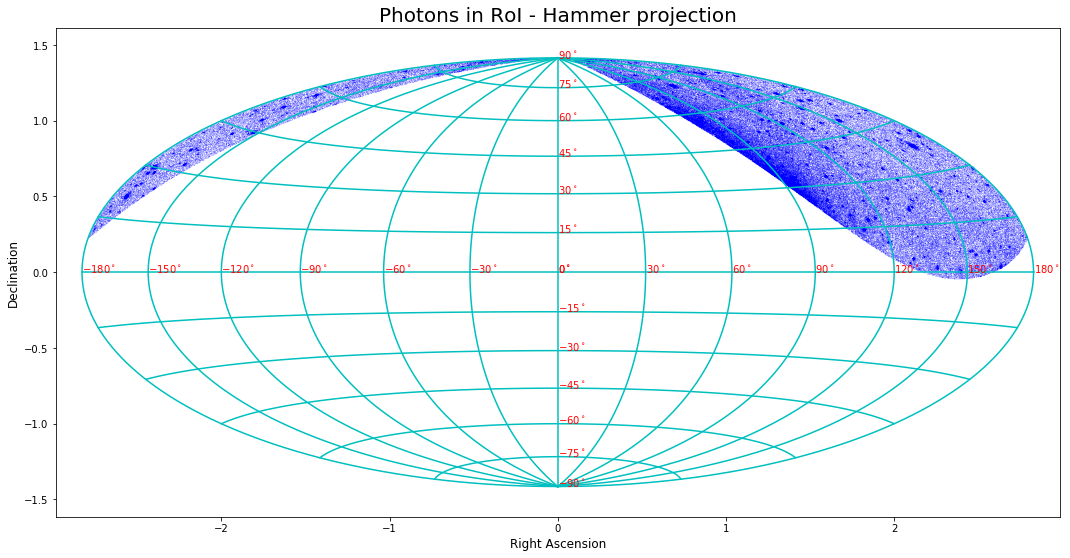

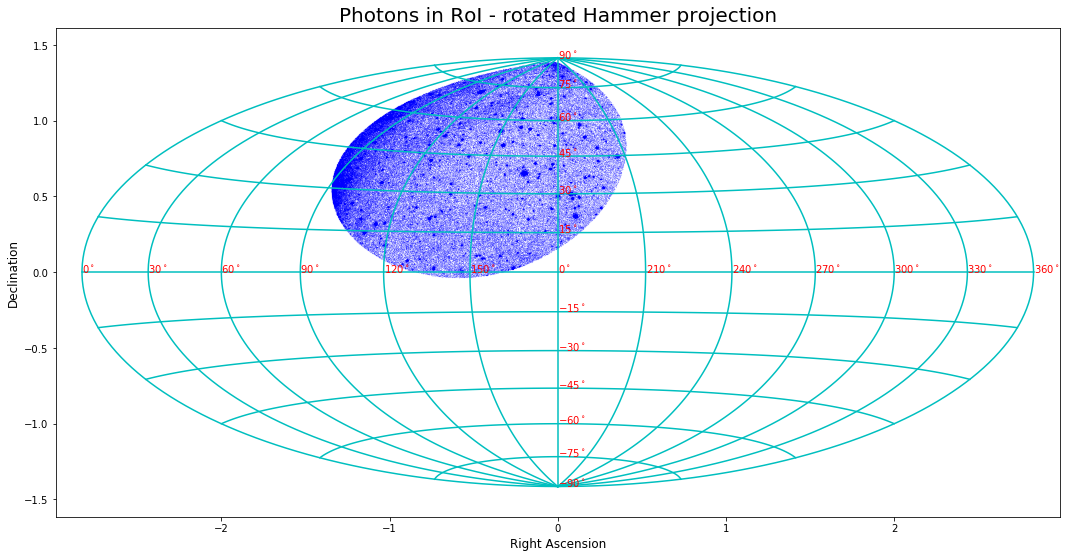

Date and time  2017-06-20 15:23:57.155376
Time since last check is  0:00:04.506432


In [9]:
#
# Galactic plane with J2000 equinox:
def deltaGal(alpha):
    '''
    Define Dec (radians) corresponding to input RA (degrees) of points on Galactic plane
    '''
    alpha0 = 282.85*np.pi/180.0
    deltaNGP = 27.13*np.pi/180.0
    #
    delt = np.arctan(np.sin(alphaG*np.pi/180.0 - alpha0)/np.tan(deltaNGP))*180/np.pi
    return delt
#
print "Number of photons ",nGammas
print "RA ",RA," Dec ",Dec," RadRoI ",RadRoI
#
eArrPhotons = arrPhotons[:,0]
raArrPhotons = arrPhotons[:,1]
decArrPhotons = arrPhotons[:,2]
#
# Example using above routines to make scatter plot in standard Hammer projection.
fig = plt.figure(figsize=(18, 9))
plt.title('Photons in RoI - Hammer projection', fontsize=20)
plt.xlabel('Right Ascension', fontsize=12)
plt.ylabel('Declination', fontsize=12)
raL, decL = np.zeros(2), np.zeros(2)
raL[0], raL[1] = -180, 180
decL[0], decL[1] = -90, 90
xL, yL = np.zeros(2), np.zeros(2)
rTest = np.linspace(raL[0], raL[1], 10)
dTest = np.linspace(decL[0], decL[1], 10)
gTx, gTy = np.meshgrid(rTest, dTest)
xTest, yTest = hammer(gTx, gTy)
Offset = 0.2
xL[0], yL[0] = np.amin(xTest) - Offset, np.amin(yTest) - Offset
xL[1], yL[1] = np.amax(xTest) + Offset, np.amax(yTest) + Offset
hamscat(raArrPhotons, decArrPhotons, 0.001, 'b')
hamscale(raL, decL, "r")
plt.xlim(xL[0], xL[1])
plt.ylim(yL[0], yL[1])
plt.show()
#
# Example using above routines to make scatter plot in Hammer projection with Fermi convention.
fig = plt.figure(figsize=(18, 9))
plt.title('Photons in RoI - rotated Hammer projection', fontsize=20)
plt.xlabel('Right Ascension', fontsize=12)
plt.ylabel('Declination', fontsize=12)
raL, decL = np.zeros(2), np.zeros(2)
raL[0], raL[1] = -180, 180
decL[0], decL[1] = -90, 90
xL, yL = np.zeros(2), np.zeros(2)
rTest = np.linspace(raL[0], raL[1], 10)
dTest = np.linspace(decL[0], decL[1], 10)
gTx, gTy = np.meshgrid(rTest, dTest)
xTest, yTest = hammer(gTx, gTy)
xL[0], yL[0] = np.amin(xTest) - Offset, np.amin(yTest) - Offset
xL[1], yL[1] = np.amax(xTest) + Offset, np.amax(yTest) + Offset
hamscatZero(raArrPhotons, decArrPhotons, 0.001, 'b')
hamscaleZero(raL, decL, "r")
plt.xlim(xL[0], xL[1])
plt.ylim(yL[0], yL[1])
plt.show()
#
then = now
now = datetime.datetime.now()
print "Date and time ",str(now)
print "Time since last check is ",str(now - then)

Plot and fit the energy spectrum using scipy.optimize leastsq routine. Try "log parabola" functional form:
$$
f(E) = N_0\frac{E}{E_b}^{-(\alpha + \beta\log(E/E_b))}.
$$
Here:  
p[0] = $N_0$,  
p[1] = $E_b$.  
p[2] = $\alpha$,  
p[3] = $\beta$.    
Note: $E_b$ (p[1]) is a scale parameter that should be set near the lower energy range of the spectrum being fitted and is usually fixed (Massaro et al., A&A (2004) 413, 489).

Differential required for calculating cost function if want to include x errors is:
$$
\frac{{\partial f}}{{\partial E}} = \frac{{{N_0}}}{E}\left( {\alpha  + 2\beta \log \left[ {\frac{E}{{{E_b}}}} \right]} \right){\left( {\frac{E}{{{E_b}}}} \right)^{ - \left( {\alpha  + \beta \log \left[ {\frac{E}{{{E_b}}}} \right]} \right)}}.
$$
Alternatively, try broken power law:

$$ 
f(E) = N_0 \times  \begin{array}{ll} (E/E_b)^{\gamma_1} & \mbox{if $E < E_b$}\\ (E/E_b)^{\gamma_2} & \mbox{otherwise.} \end{array}
$$

Differential required for calculating cost function if want to include x errors is:
$$
\frac{{\partial f}}{{\partial E}} = \frac{{\gamma {N_0}}}{{{E_b}}}{\left( {\frac{E}{{{E_b}}}} \right)^{\gamma  - 1}}.
$$

Here  
p[0] = $N_0$  
p[1] = $E_b$  
p[2] = $\gamma_1$  
p[3] = $\gamma_2$  


Date and time  2017-06-20 14:08:52.350795
Log parabola with N0 = 1.000, alpha = 1.600, beta = 0.090, normalisation 50957.747
 
Total number of photons  302130.0
Fit quality: chi**2 =  16.2950884618  chisq/NDF =   0.479267307701
 
Fit results: 
N0 =  2.71336814406  +/-  0.040215940877
alpha =  2.32401957359  +/-  0.0145780842841
beta =  0.0198029196641  +/-  0.0133895659243
 
Date and time  2017-06-20 14:08:52.668509
Time since last check is  0:00:00.317714


/home/green/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:71: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


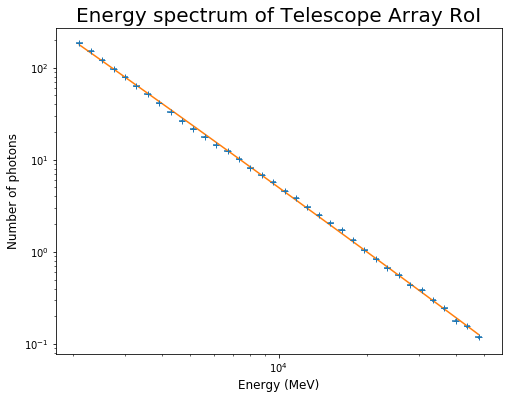

In [10]:
import datetime
now = datetime.datetime.now()
print "Date and time ",str(now)
#
from scipy.optimize import leastsq
from scipy.integrate import quad
#
Eb = 13000
def fE(E, N0, alpha, beta):
    '''
    Return relative frequency given energy and fit parameters for log parabola
    '''
    f = N0*(E/Eb)**(-alpha - beta*np.log(E/Eb))
    return f
# 
N0 = 1.0
alpha = 1.6
beta = 0.09
Int = quad(fE, Emin, Emax, args = (N0, alpha, beta))
Norm = Int[0]
print "Log parabola with N0 = {:.3f}, alpha = {:.3f}, beta = {:.3f}, normalisation {:.3f}".\
       format(N0, alpha, beta,Norm)
#
# Define fit and cost functions
# 1) Log parabola
nPar = 3
def fitFunc(p,x):
    '''
    Log parabola fit function
    '''
    f = p[0]*(x/Eb)**(-p[1] - p[2]*np.log(x/Eb))
    return f
def errFunc(p,x,y,xerr,yerr):
    '''
    Log parabola cost function
    '''
    df = p[0]/x*(p[1] + 2*p[2]*np.log(x/Eb))*(x/Eb)**(-p[1] - p[2]*np.log(x/Eb))
    e = (y - fitFunc(p, x))/np.sqrt(df**2*xerr**2 + yerr**2)
#    e = (y - fitFunc(p, x))/np.sqrt(yerr**2)
    return e
#
#
Ledges = np.linspace(np.log(Emin),np.log(Emax),nEbins)
edges = np.exp(Ledges)
fig = plt.figure(figsize=(8, 6))
plt.yscale('log')
plt.xscale('log')
eArrPhotons = arrPhotons[:,0]
histEphotons, bins = np.histogram(eArrPhotons,edges)
fTotal = float(np.sum(histEphotons))
eBcentre = (bins[:-1] + bins[1:])/2.0
eBwidth = (bins[1:] - bins[:-1])
eBerr = eBwidth/np.sqrt(12.0)
hcorrEphotons = histEphotons/eBwidth
hcorrErr = np.sqrt(histEphotons)/eBwidth
#
# set initial values of fit parameters, run "least squares" fit
pInit = [fTotal/Norm, alpha, beta]
#
# Fit
out = leastsq(errFunc, pInit, args=(eBcentre, hcorrEphotons, eBerr, hcorrErr), full_output=1)
#
# Get output
pFinal = out[0]
covar = out[1]
pGlobal = pFinal
cGlobal = covar
#
# Chi square calculation
chiSqArr = errFunc(pFinal, eBcentre, hcorrEphotons, eBerr, hcorrErr)**2
chiSq = np.sum(chiSqArr)
NDF = nEbins - nPar
redChiSq = chiSq/NDF
#
print " "
print "Total number of photons ",fTotal
print "Fit quality: chi**2 = ",chiSq," chisq/NDF =  ",redChiSq
#print "chi**2 per point = ",chiSqArr
print " "
print "Fit results: "
if (covar == None):
    print "Covariance not determined."
    print "N0 = ",pFinal[0]
    print "alpha = ",pFinal[1]
    print "beta = ",pFinal[2]
else:
    print "N0 = ",pFinal[0]," +/- ",np.sqrt(covar[0,0])
    print "alpha = ",pFinal[1]," +/- ",np.sqrt(covar[1,1])
    print "beta = ",pFinal[2]," +/- ",np.sqrt(covar[2,2])
print " "
#
if SourceName == "AGhotspot":
    plt.title('Energy spectrum of Auger RoI', fontsize=20)
elif SourceName == "TAhotspot":
    plt.title('Energy spectrum of Telescope Array RoI', fontsize=20)
else:
    "Source not recognised "
    sys.exit()
plt.xlabel('Energy (MeV)', fontsize=12)
plt.ylabel('Number of photons', fontsize=12)
plt.errorbar(eBcentre, hcorrEphotons, xerr = eBerr, yerr = hcorrErr, fmt = "+")
plt.plot(eBcentre,fitFunc(pFinal, eBcentre))
#
then = now
now = datetime.datetime.now()
print "Date and time ",str(now)
print "Time since last check is ",str(now - then)

Example plots of Galactic plane in equatorial coordinates.

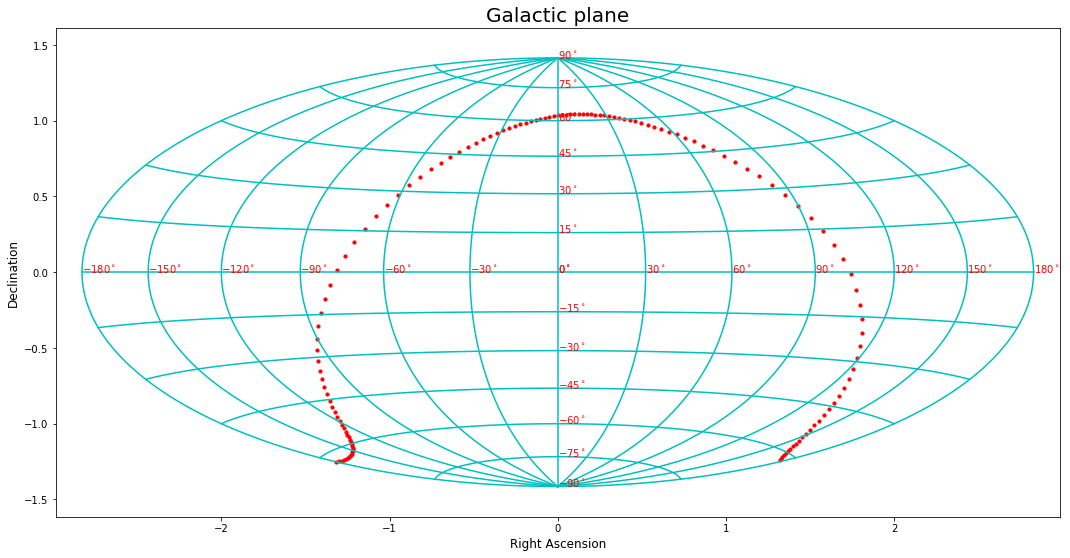

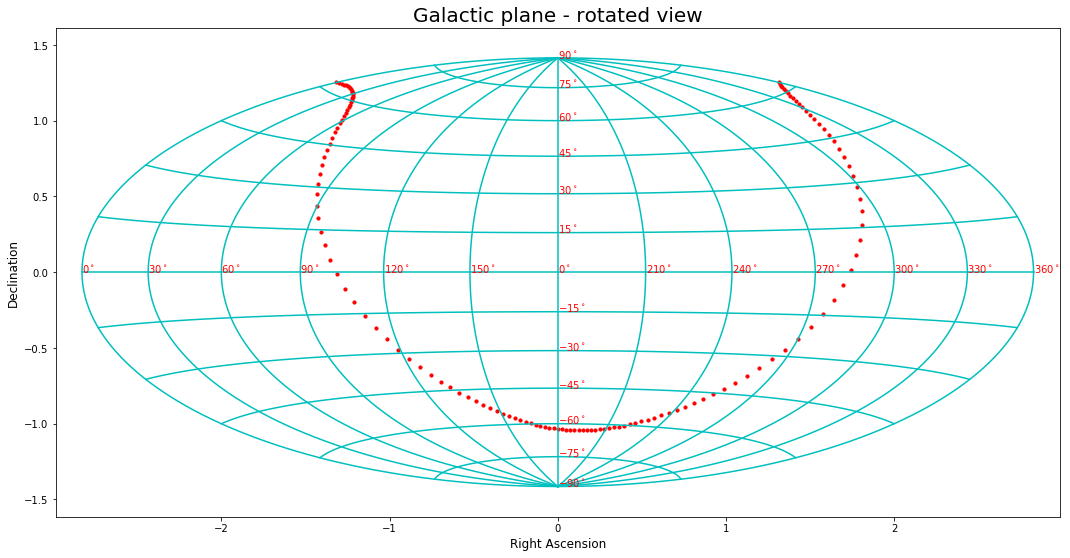

In [12]:
#
# Plot of position of Galactic plane in standard Hammer projection, equatorial coordinates
nPoints = 137
dist = 10
alphaG = np.linspace(0, 360, nPoints)
deltaG = deltaGal(alphaG)
#
fig = plt.figure(figsize=(18, 9))
plt.title('Galactic plane', fontsize=20)
plt.xlabel('Right Ascension', fontsize=12)
plt.ylabel('Declination', fontsize=12)
raL, decL = np.zeros(2), np.zeros(2)
raL[0], raL[1] = -180, 180
decL[0], decL[1] = -90, 90
xL, yL = np.zeros(2), np.zeros(2)
rTest = np.linspace(raL[0], raL[1], 10)
dTest = np.linspace(decL[0], decL[1], 10)
gTx, gTy = np.meshgrid(rTest, dTest)
xTest, yTest = hammer(gTx, gTy)
Offset = 0.2
xL[0], yL[0] = np.amin(xTest) - Offset, np.amin(yTest) - Offset
xL[1], yL[1] = np.amax(xTest) + Offset, np.amax(yTest) + Offset
hamscat(alphaG, deltaG, 10, "r")
hamscale(raL, decL, "r")
plt.xlim(xL[0], xL[1])
plt.ylim(yL[0], yL[1])
plt.show()
#
# Plot of position of Galactic plane in "Fermi" Hammer projection, equatorial coordinates
fig = plt.figure(figsize=(18, 9))
plt.title('Galactic plane - rotated view', fontsize=20)
plt.xlabel('Right Ascension', fontsize=12)
plt.ylabel('Declination', fontsize=12)
raL, decL = np.zeros(2), np.zeros(2)
raL[0], raL[1] = -180, 180
decL[0], decL[1] = -90, 90
xL, yL = np.zeros(2), np.zeros(2)
rTest = np.linspace(raL[0], raL[1], 10)
dTest = np.linspace(decL[0], decL[1], 10)
gTx, gTy = np.meshgrid(rTest, dTest)
xTest, yTest = hammer(gTx, gTy)
Offset = 0.2
xL[0], yL[0] = np.amin(xTest) - Offset, np.amin(yTest) - Offset
xL[1], yL[1] = np.amax(xTest) + Offset, np.amax(yTest) + Offset
hamscatZero(alphaG, deltaG, 10, "r")
hamscaleZero(raL, decL, "r")
plt.xlim(xL[0], xL[1])
plt.ylim(yL[0], yL[1])
plt.show()
#

Example 2D histograms.

Date and time  2017-06-20 14:17:18.676853


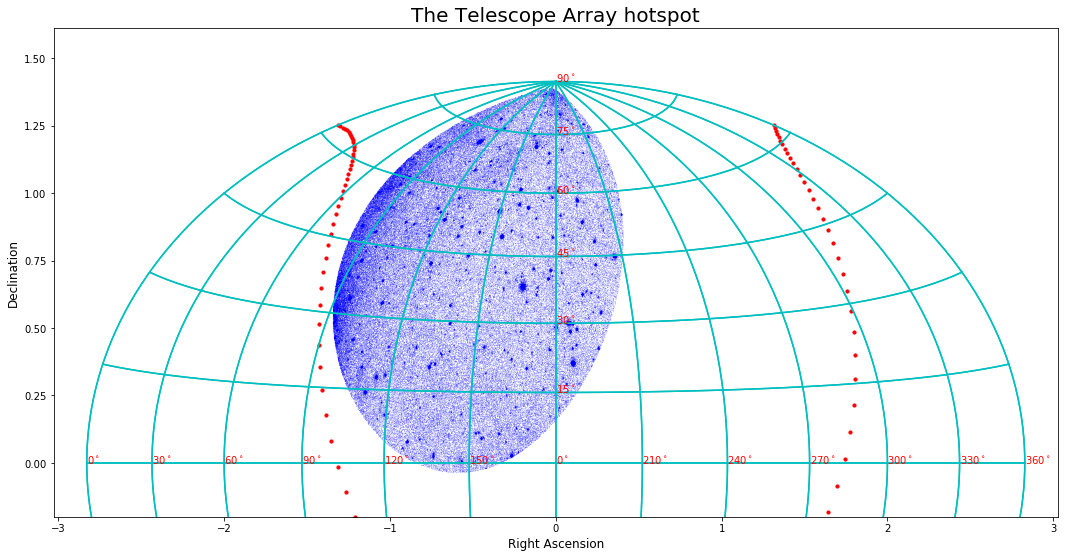

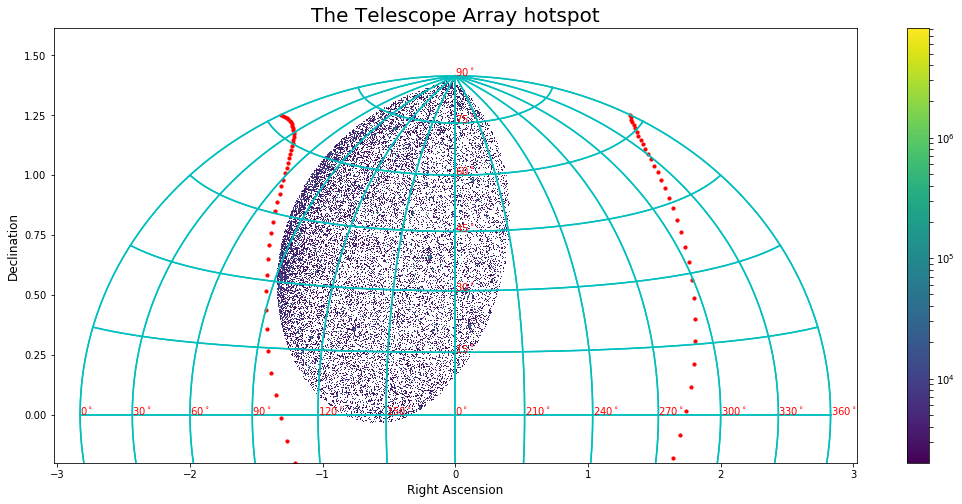

Date and time  2017-06-20 14:17:22.331563
Time since last check is  0:00:03.654710


In [15]:
import datetime
now = datetime.datetime.now()
print "Date and time ",str(now)
#
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
#

fig = plt.figure(figsize=(18, 9))
plt.xlabel('Right Ascension', fontsize=12)
plt.ylabel('Declination', fontsize=12)
plt.title('The Auger hotspot', fontsize=20)
raL, decL = np.zeros(2), np.zeros(2)
raL[0], raL[1] = 15, 180
decL[0], decL[1] = -90, 30
xL, yL = np.zeros(2), np.zeros(2)
rTest = np.linspace(raL[0], raL[1], 10)
dTest = np.linspace(decL[0], decL[1], 10)
gTx, gTy = np.meshgrid(rTest, dTest)
xTest, yTest = hammer(gTx, gTy)
Offset = 0.2
xL[0], yL[0] = np.amin(xTest) - Offset, np.amin(yTest) - Offset
xL[1], yL[1] = np.amax(xTest) + Offset, np.amax(yTest) + Offset
hamscat(raArrPhotons, decArrPhotons, 0.001, 'b')
hamscat(alphaG, deltaG, 10, 'r')
hamscale(raL, decL, "r")
plt.xlim(xL[0], xL[1])
plt.ylim(yL[0], yL[1])
plt.show()
#
fig = plt.figure(figsize=(18, 8))
plt.title('The Telescope Array hotspot', fontsize=20)
plt.xlabel('Right Ascension', fontsize=12)
plt.ylabel('Declination', fontsize=12)
raL, decL = np.zeros(2), np.zeros(2)
raL[0], raL[1] = -180, 180
decL[0], decL[1] = 0, 90
xL, yL = np.zeros(2), np.zeros(2)
rTest = np.linspace(raL[0], raL[1], 10)
dTest = np.linspace(decL[0], decL[1], 10)
gTx, gTy = np.meshgrid(rTest, dTest)
xTest, yTest = hammer(gTx, gTy)
Offset = 0.2
xL[0], yL[0] = np.amin(xTest) - Offset, np.amin(yTest) - Offset
xL[1], yL[1] = np.amax(xTest) + Offset, np.amax(yTest) + Offset
hamhistZero(raArrPhotons, decArrPhotons, eArrPhotons)
plt.colorbar()
hamscatZero(alphaG, deltaG, 10, 'r')
hamscaleZero(raL, decL, "r")
plt.xlim(xL[0], xL[1])
plt.ylim(yL[0], yL[1])
plt.show()
#
then = now
now = datetime.datetime.now()
print "Date and time ",str(now)
print "Time since last check is ",str(now - then)